### 시각화

synth.th.image1.jpg


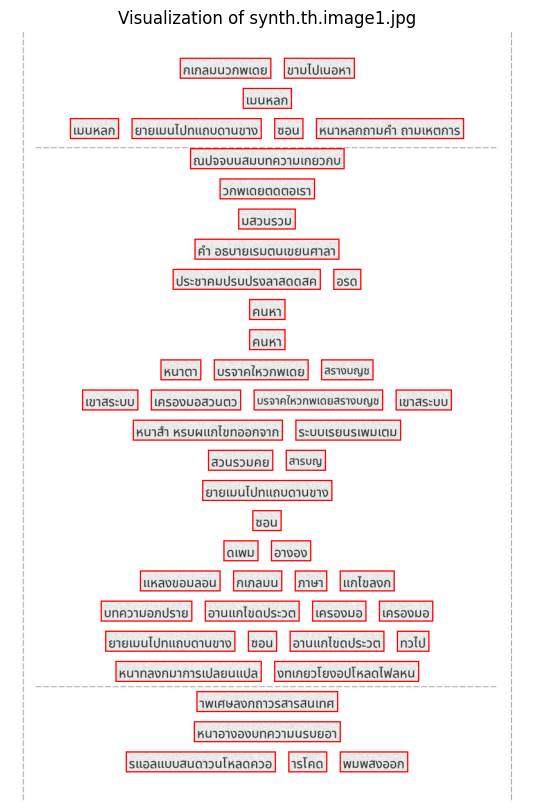

In [1]:
import json
import os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# 이미지와 어노테이션 파일 경로 설정
def _infer_dir(lang_indicator):
        if lang_indicator == 'zh':
            lang = 'chinese'
        elif lang_indicator == 'ja':
            lang = 'japanese'
        elif lang_indicator == 'th':
            lang = 'thai'
        elif lang_indicator == 'vi':
            lang = 'vietnamese'
        else:
            raise ValueError
        return lang


language = 'th'  # 언어 폴더명 (예: 'ko')
full_lang = _infer_dir(language)
data_root = f'./data/{full_lang}_receipt'
image_index = 1  # 시각화할 이미지 번호 (예: 1)
image_path = os.path.join(data_root, f"img/train/synth.{language}.image{image_index}.jpg")
annotation_path = os.path.join(data_root, "ufo/train.json")
font_path = "./fonts/BeVietnamPro-LightItalic.ttf"
# JSON 파일 읽기
with open(annotation_path, 'r', encoding='utf-8') as f:
    annotations = json.load(f)

# 해당 이미지 ID에 해당하는 어노테이션 정보 가져오기
image_id = f"synth.{language}.image{image_index}.jpg"
print(image_id)
image_annotation = annotations['images'][image_id]

# 폰트 설정 (유니코드 지원 폰트 사용)
try:
    font = ImageFont.truetype(font_path, 16)  # 유니코드 폰트 경로
except IOError:
    font = ImageFont.load_default()

# 이미지 불러오기
image = Image.open(image_path)
draw = ImageDraw.Draw(image)

# Bounding box와 텍스트 그리기
for word_id, word_info in image_annotation['words'].items():
    transcription = word_info['transcription']
    points = word_info['points']
    points_tuple = [tuple(point) for point in points]
    # Bounding box 그리기 (사각형)
    draw.polygon(points_tuple, outline="red", width=2)
    
    # 텍스트 추가
    x, y = points[0]
    draw.text((x, y - 10), transcription, fill="blue", font=font)

# 결과 시각화
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.title(f"Visualization of {image_id}")
plt.show()
